In [1]:
import sys
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

sys.path.append('/content/gdrive/My Drive/dm_image_classification')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.applications.nasnet import NASNetLarge, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

import pickle

from definitions import absolute_path

Using TensorFlow backend.


In [3]:
base_model = NASNetLarge(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(
    x)  # we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024, activation='relu')(x)  # dense layer 2
x = Dense(512, activation='relu')(x)  # dense layer 3
preds = Dense(120, activation='softmax')(x)  # final layer with softmax activation

model = Model(inputs=base_model.input, outputs=preds)

model.load_weights(absolute_path('weights-improvement-naslarge-01.hdf5'))















343613440/343610240 [==============================] - 10s 0us/step


Found 4162 images belonging to 120 classes.
/content/gdrive/My Drive/dm_image_classification/split/val/n02102973-Irish_water_spaniel/n02102973_4510.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 4162 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


0.9998221   :   (70, 'n02102973-Irish_water_spaniel')
0.00013103028   :   (69, 'n02102480-Sussex_spaniel')
7.930765e-06   :   (62, 'n02100877-Irish_setter')
((0, 'n02085620-Chihuahua'), (1, 'n02085782-Japanese_spaniel'), (2, 'n02085936-Maltese_dog'), (3, 'n02086079-Pekinese'), (4, 'n02086240-Shih-Tzu'), (5, 'n02086646-Blenheim_spaniel'), (6, 'n02086910-papillon'), (7, 'n02087046-toy_terrier'), (8, 'n02087394-Rhodesian_ridgeback'), (9, 'n02088094-Afghan_hound'), (10, 'n02088238-basset'), (11, 'n02088364-beagle'), (12, 'n02088466-bloodhound'), (13, 'n02088632-bluetick'), (14, 'n02089078-black-and-tan_coonhound'), (15, 'n02089867-Walker_hound'), (16, 'n02089973-English_foxhound'), (17, 'n02090379-redbone'), (18, 'n02090622-borzoi'), (19, 'n02090721-Irish_wolfhound'), (20, 'n02091032-Italian_greyhound'), (21, 'n02091134-whippet'), (22, 'n02091244-Ibizan_hound'), (23, 'n02091467-Norwegian_elkhound'), (24, 'n02091635-otterhound'), (25, 'n02091831-Saluki'), (26, 'n02092002-Scottish_deerhound'

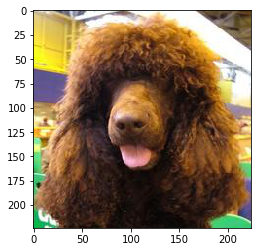

In [10]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = test_datagen.flow_from_directory(
    absolute_path('split/val'),
    target_size=(331, 331),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

imageno = np.random.random_integers(low=0, high=validation_generator.samples)

name = validation_generator.filepaths[imageno]
print(name)
plt.imshow(mpimg.imread(name))

img = Image.open(validation_generator.filepaths[imageno]).resize((331, 331))
probabilities = model.predict(preprocess_input(np.expand_dims(img, axis=0)))
breed_list = tuple(zip(validation_generator.class_indices.values(), validation_generator.class_indices.keys()))

for i in probabilities[0].argsort()[-3:][::-1]:
    print(probabilities[0][i], "  :  ", breed_list[i])


with open(absolute_path('breed_list.pickle'), 'wb') as handle:
    pickle.dump(breed_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(absolute_path('breed_list.pickle'), 'rb') as handle:
    breed_list_loaded = pickle.load(handle)
    print(breed_list_loaded)

print(breed_list)


In [4]:
with open(absolute_path('breed_list.pickle'), 'rb') as handle:
    breed_list = pickle.load(handle)

    img = Image.open(absolute_path('5.jpg')).resize((331, 331))
    probabilities = model.predict(preprocess_input(np.expand_dims(img, axis=0)))

    for i in probabilities[0].argsort()[-3:][::-1]:
        print(probabilities[0][i], "  :  ", breed_list[i])

0.99952877   :   (84, 'n02106662-German_shepherd')
0.00038829222   :   (76, 'n02105412-kelpie')
1.9407391e-05   :   (41, 'n02096177-cairn')


In [0]:
from localization.model import LocalizationModel
from localization.dataset import LocalizationDataset

In [0]:
import torch
from torch import nn
from torchvision import models, transforms
import os
from definitions import IMAGES_DIR, ANNOTATIONS_DIR

In [9]:
model = LocalizationModel()
model.load_state_dict(torch.load(absolute_path('localization_01.pt')))

<All keys matched successfully>

In [0]:
test_tsfm = transforms.Compose([
        transforms.Resize([332, 332]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])

In [0]:
all_img_folder = os.listdir(IMAGES_DIR)
all_annotation_folder = os.listdir(ANNOTATIONS_DIR)

all_img_name = []
for img_folder in all_img_folder:
    img_folder_path = '{}/{}'.format(IMAGES_DIR, img_folder)
    all_img_name += list(map(lambda x: img_folder + '/' + x, os.listdir(img_folder_path)))

all_annotation_name = []
for annotation_folder in all_annotation_folder:
    annotation_folder_path = '{}/{}'.format(ANNOTATIONS_DIR, annotation_folder)
    all_annotation_name += list(map(lambda x: annotation_folder + '/' + x, os.listdir(annotation_folder_path)))

In [0]:
with open(absolute_path('image_names.pickle'), 'wb') as handle:
    pickle.dump(all_img_name, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
with open(absolute_path('annotation_names.pickle'), 'wb') as handle:
    pickle.dump(all_annotation_name, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
from torch.utils.data import DataLoader

In [0]:
test_ds = LocalizationDataset(all_img_name[int(len(all_img_name) * 0.999):], is_test=True, transform=test_tsfm)
test_dl = DataLoader(test_ds, batch_size=1)

In [51]:
print(test_dl.dataset.__len__())

21


In [0]:
import tqdm

In [0]:
from PIL import Image, ImageDraw

In [0]:
model.eval()

draw_img = []
for step, img in enumerate(test_dl):
    print(step)
    plt.imshow(np.add(np.divide(np.swapaxes(np.swapaxes(img[0],0,2), 0, 1), 4), 0.5))
    
    print(img[0, 0:1, 0:10, 0:2])
    pred = model(img)

    origin_img = transforms.ToPILImage()(img.cpu().squeeze())
    draw = ImageDraw.Draw(origin_img)
    xmin, ymin, xmax, ymax = tuple(pred.squeeze().tolist())
    draw.rectangle(xy=[(int(xmin), int(ymin)), (int(xmax), int(ymax))])
    draw_img.append(origin_img)
    # plt.imshow(origin_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

0 250 9 329


TypeError: ignored

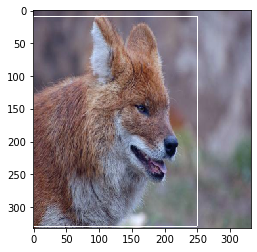

In [110]:
model.eval()

draw_img = []
for step, img in enumerate(test_dl):
    pred = model(img)

    origin_img = transforms.ToPILImage()(img.cpu().squeeze())

    xmin, ymin, xmax, ymax = tuple(pred.squeeze().tolist())

    display_img = np.add(np.divide(np.swapaxes(np.swapaxes(img[0],0,2), 0, 1), 4), 0.5)
    
    xmin = max(0,min(331,int(xmin)))
    xmax = max(0,min(331,int(xmax)))
    ymin = max(0,min(331,int(ymin)))
    ymax = max(0,min(331,int(ymax)))

    for i in range(ymin,ymax):
      display_img[i][xmin][0] = display_img[i][xmin][1] = display_img[i][xmin][2] = 1
      display_img[i][xmax][0] = display_img[i][xmax][1] = display_img[i][xmax][2] = 1

    for i in range(xmin,xmax):
      display_img[ymin][i][0] = display_img[ymin][i][1] = display_img[ymin][i][2] = 1
      display_img[ymax][i][0] = display_img[ymax][i][1] = display_img[ymax][i][2] = 1  

    plt.imshow(display_img)

    if step == 13:
      print(xmin, xmax, ymin, ymax)
    if step == 13:
      raise "mue"